전단변환 층밀림변한 (한쪽으로 잡아 늘리기)

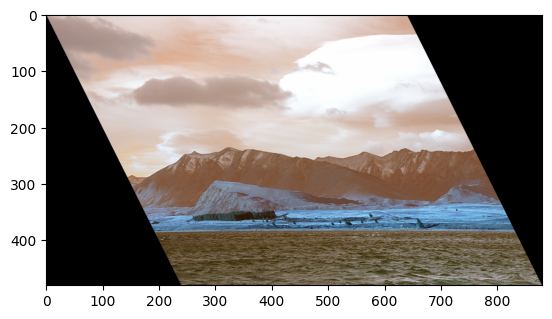

In [1]:
import sys
import numpy as np
import cv2 
from matplotlib import pyplot as plt
src = cv2.imread('tekapo.bmp')
cap = cv2.VideoCapture(0)

if src is None:
    print('Image load failed')
    sys.exit()

h, w = src.shape[:2]
m = 0.5

aff = np.array([ [1, m, 0], 
                 [0, 1, 0] ], dtype = np.float32) 
## 이동할 정보를 가지고 있는 2x3 행렬
## 회전은 없고 평행이동만 있음
dst = cv2.warpAffine(src, aff, (w + int(0.5 * h), h))
##영상크기 (0, 0) ==> 자동으로 입력 영상크기가 출력영상 크기가됨

plt.imshow(src)
plt.imshow(dst)
while(True):
    ret, frame = cap.read()
    
    h, w = frame.shape[:2]
    
    aff = np.array([ [1, m, 0], 
                 [0, 1, 0] ], dtype = np.float32) 
    dst = cv2.warpAffine(frame, aff, (w + int(0.5 * h), h))
    
    cv2.imshow('frame',dst)
    if cv2.waitKey(1) == 27:
        
        break
    
cap.release()
cv2.waitKey()
cv2.destroyAllWindows()